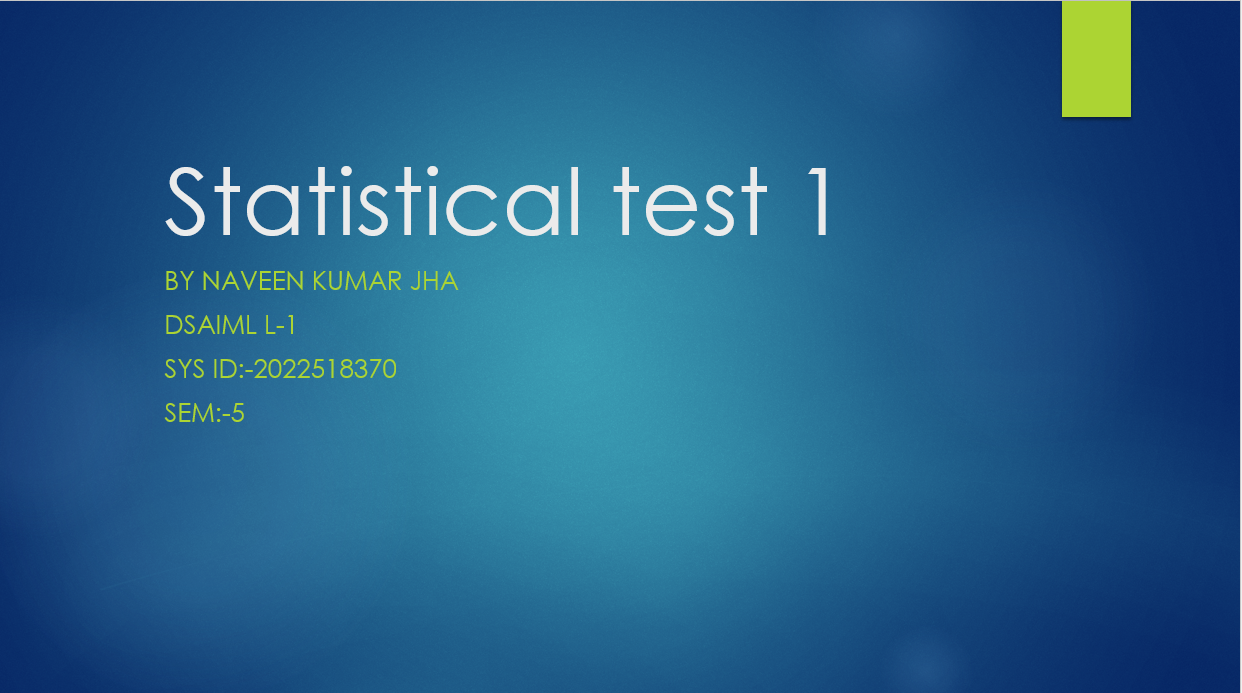

In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import scipy
scipy.__version__

'1.13.1'

In [ ]:
df = pd.read_csv('/Test1.csv')

In [ ]:
df.head()

,user_id,age_group,subscription_status,engagement_time
0,14451,18-34,subscribed,5.55
1,18386,under 18,subscribed,5.12
2,12305,35 and over,not_subscribed,4.25
3,17546,18-34,subscribed,8.54
4,15399,18-34,subscribed,12.12


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1000 non-null   int64  
 1   age_group            1000 non-null   object 
 2   subscription_status  1000 non-null   object 
 3   engagement_time      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [ ]:
df.isna().sum()

,0
user_id,0
age_group,0
subscription_status,0
engagement_time,0


In [ ]:
df.describe()

,user_id,engagement_time
count,1000.000000,1000.000000
mean,15024.803000,6.180030
std,2927.044957,2.757166
min,10000.000000,0.220000
25%,12452.500000,3.917500
50%,15184.000000,6.000000
75%,17481.250000,8.110000
max,19976.000000,16.980000


Sample mean: 6.18


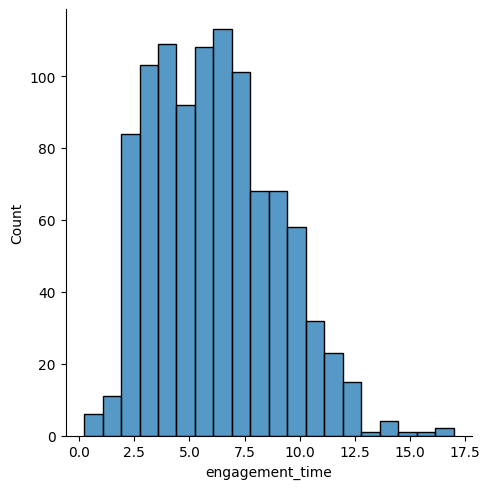

In [ ]:
print('Sample mean:', np.round(df.engagement_time.mean(),2))
sns.displot(df.engagement_time)
plt.show()

In [ ]:
hyp_mean=6
t_stat, p_value=stats.ttest_1samp(df['engagement_time'], hyp_mean, alternative='greater')
print("Test Statistic=",t_stat)
print("p-value = ", p_value)

Test Statistic= 2.0648187232381248
p-value =  0.019598877431817586


In [ ]:
from scipy.stats import t

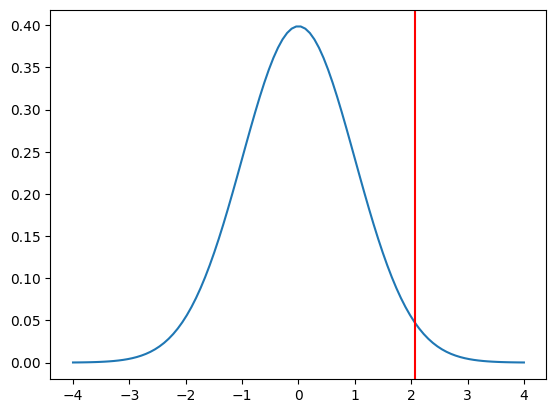

In [ ]:
x=np.linspace(-4,4,100)
plt.plot(x, t.pdf(x,df=len(df)-1))
plt.axvline(x=t_stat, c='r')
plt.show()

In [ ]:
if p_value<0.95:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the r')
else:
  print(f'As the p-value {p_value} is greater than the level of significance, we accept the r')

As the p-value 0.019598877431817586 is less than the level of significance, we reject the r


In [ ]:
pd.crosstab(df.age_group,df.subscription_status,margins=True)

subscription_status,not_subscribed,subscribed,All
age_group,,,
18-34,103,262,365
35 and over,237,171,408
under 18,107,120,227
All,447,553,1000


<Axes: xlabel='age_group'>

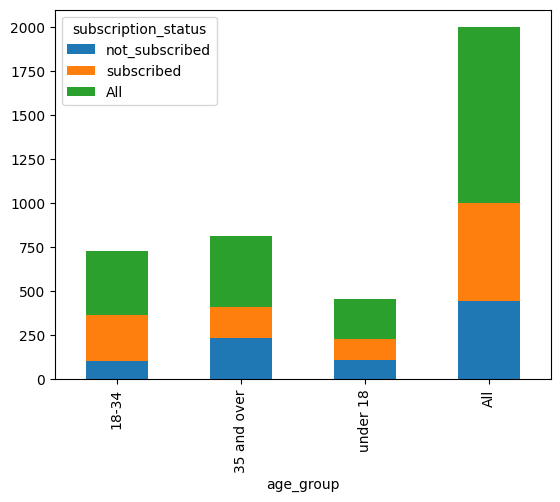

In [ ]:
pd.crosstab(df.age_group,df.subscription_status,margins=True).plot(kind='bar', stacked=True)

In [ ]:
contingency_table=pd.crosstab(df.age_group,df.subscription_status)
contingency_table

subscription_status,not_subscribed,subscribed
age_group,,
18-34,103,262
35 and over,237,171
under 18,107,120


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi, p_value, dof, expected=chi2_contingency(contingency_table)
print("Test Statistic =", chi)
print("p-value =",p_value)
print("Degreed of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 70.23716243606756
p-value = 5.600076564450542e-16
Degreed of freedom = 2
Expected frequencies 
 [[163.155 201.845]
 [182.376 225.624]
 [101.469 125.531]]


In [ ]:
if p_value<0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the r')
else:
  print(f'As the p-value {p_value} is greater than the level of significance, we accept the r')

As the p-value 5.600076564450542e-16 is less than the level of significance, we reject the r
